In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import operator
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_log_error

In [2]:
df = pd.read_csv('../data/cleaned_dataset_train.csv')
df.dtsold = pd.to_datetime(df.dtsold)
df.dtsold=df.dtsold.map(dt.datetime.toordinal)

In [ ]:
## Feature Engineering

In [3]:
df['baths'] = df.fullbath + df.halfbath /2

In [245]:
target = df['saleprice']

In [5]:
def run_lm(feat):
    mdf = df[list(feat)]
    if any(df[list(combo)].dtypes == 'object'):        
        return 0
    lm = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(mdf, target, test_size=0.33, random_state=42)
    lm.fit(X_train, y_train)
    return lm.score(X_test,y_test)



In [ ]:
df[list(combo)].dtypes

In [ ]:
scores = {}
#for combo in combinations(df.drop(['id','saleprice'],axis=1),3):
##    scores[combo] = run_lm(combo)
#    if len(scores) % 1000 == 0:
#        m = max(scores, key=scores.get)
#        print("iter {}\tHighest Score: {}\tFeatures: {}".format(len(scores),round(scores[m],4),m))
    

In [ ]:
with open('3comboScores.csv','w') as f:
    for key in scores.keys():
        f.write("%s,%s\n"%(key,scores[key]))

In [ ]:
scores_df.head()

In [86]:
dftest = pd.read_csv('../data/test.csv')
dftest.columns = map(str.lower, dftest.columns)

In [ ]:
lm2 = LinearRegression()
df2 = df[['grlivarea', 'overallqual', 'yearbuilt']]
lm2.fit(df2,np.log(df.saleprice))
out = lm2.predict(dftest[['grlivarea', 'overallqual', 'yearbuilt']])

In [ ]:
pdout = pd.DataFrame({'SalePrice':np.exp(out)},index=dftest.id)

In [ ]:
pdout.to_csv('submission.csv')

In [ ]:
np.exp(out)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
lm = LinearRegression()

lm.fit(df[['grlivarea', 'overallqual', 'yearbuilt']],df.saleprice)
pred = lm.predict(dftest[['grlivarea', 'overallqual', 'yearbuilt']])

In [ ]:
mdf = df[['grlivarea', 'overallqual', 'yearbuilt']]
target = df.saleprice

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mdf, target, test_size=0.33, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
np.sqrt(mean_squared_log_error( y_test, pred ))

In [7]:
numeric_features = df.select_dtypes(include=[np.number])

In [8]:
corr = numeric_features.corr()
print(corr['saleprice'].sort_values(ascending=False)[:5])
print(corr['saleprice'].sort_values(ascending=False)[-5:])

saleprice      1.000000
overallqual    0.790982
grlivarea      0.708624
garagecars     0.640409
garagearea     0.623431
Name: saleprice, dtype: float64
garagecond_fnone    -0.236832
garagequal_fnone    -0.236832
saletype_fwd        -0.242598
garagetype_detchd   -0.354141
garagefinish_funf   -0.410608
Name: saleprice, dtype: float64


In [9]:
most_corr = df[np.concatenate((corr['saleprice'].sort_values(ascending=False)[-5:].index.values,
                               corr['saleprice'].sort_values(ascending=False)[1:5].index.values))]

In [10]:
pred[pred<0]

NameError: name 'pred' is not defined

0.014109404345154314

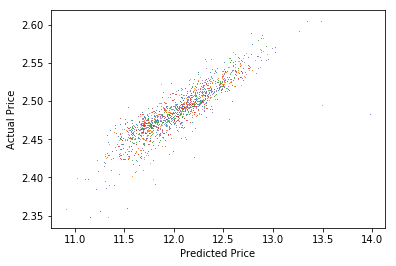

In [11]:
lm = LinearRegression()
kf = KFold(n_splits=5)
X = most_corr.values
y = np.log(target.values)
scores = []
kf.get_n_splits(X, y)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lm.fit(X_train, y_train)
    pred = np.exp(lm.predict(X_test))
    scores.append(np.sqrt(mean_squared_log_error(np.exp(y_test),pred)))
    plt.scatter(pred, y_test,marker='o',linewidths=0.001,s=1)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

np.mean(scores)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rm_scores = {}
for i in np.linspace(-3, 3,100):
    alpha = 10**i
    rm = Ridge(alpha = alpha)
    rm.fit(X_train, y_train)
    pred = np.exp(rm.predict(X_test))
    rm_scores[alpha] = np.sqrt(mean_squared_log_error(np.exp(y_test), pred))
    print('alpha: {}\tscore: {}'.format(alpha, rm_scores[alpha]))

alpha: 0.001	score: 0.014686492054181896
alpha: 0.0011497569953977356	score: 0.014686491421777038
alpha: 0.0013219411484660286	score: 0.01468649069467159
alpha: 0.0015199110829529332	score: 0.014686489858685526
alpha: 0.001747528400007683	score: 0.01468648889751595
alpha: 0.002009233002565048	score: 0.014686487792419383
alpha: 0.0023101297000831605	score: 0.014686486521846573
alpha: 0.0026560877829466868	score: 0.014686485061022578
alpha: 0.0030538555088334154	score: 0.01468648338146435
alpha: 0.003511191734215131	score: 0.014686481450425967
alpha: 0.004037017258596553	score: 0.014686479230261154
alpha: 0.004641588833612782	score: 0.014686476677690545
alpha: 0.005336699231206312	score: 0.014686473742959597
alpha: 0.006135907273413176	score: 0.014686470368870915
alpha: 0.007054802310718645	score: 0.014686466489672263
alpha: 0.008111308307896872	score: 0.014686462029778883
alpha: 0.0093260334688322	score: 0.01468645690230583
alpha: 0.010722672220103232	score: 0.014686451007381422
alpha: 

In [ ]:
rm_pd = pd.DataFrame.from_dict(rm_scores, orient='index')
rm_pd.idxmin(axis=0)

In [ ]:
rm_scores[46.41588833612782]

In [ ]:
min(rm_scores, key=rm_scores.get)

In [ ]:
# Min Alpha for Ridge Regression
alpha = 46.41588833612782


In [44]:
combo3 = pd.read_csv('3comboScores.csv',header=-1)
combo3[0] = combo3[0].str[2:-1]
combo3[1] = combo3[1].str[2:-1]
combo3[2] = combo3[2].str[2:-2]
combo3.columns = ['f1','f2','f3','sc']
combo3.head()

,f1,f2,f3,sc
0,garagecars,garagearea,wooddecksf,0.488182
1,garagecars,garagearea,openporchsf,0.501109
2,garagecars,garagearea,enclosedporch,0.456901
3,garagecars,garagearea,x3ssnporch,0.460277
4,garagecars,garagearea,screenporch,0.467165


In [258]:
def test_lm(feat,model):
    """
    Trains a linear regression model given a set of features.
    Prints the MSL
    Produces a csv of predictions to run on Kaggle.
    """
    ##Instatiate Model
    lm = model()
    
    ##Split train test sets on training dataset
    X_train,X_test,y_train,y_test = train_test_split(
        df[feat],np.log(target),test_size=0.33,random_state=42)
    
    ##Find alpha that minimizes RLMSE
    lm_scores = {}
    for i in np.linspace(-3, 3,100):
        alpha = 10**i
        lm.set_params(alpha = alpha)
        lm.fit(X_train, y_train)
        pred = np.exp(lm.predict(X_test))
        lm_scores[alpha] = np.sqrt(mean_squared_log_error(np.exp(y_test), pred)) 
    alpha = min(lm_scores, key=lm_scores.get)
    
    ##Train model on minimizing alpha
    lm.set_params(alpha = alpha)
    lm.fit(df[feat], np.log(target))
    pred = np.exp(lm.predict(X_test))
    print(np.sqrt(mean_squared_log_error(np.exp(y_test), pred)))
    
    ##Generate predictions on testing dataset
    pred = np.exp(lm.predict(dftest[feat]))
    return pd.DataFrame({'id':dftest.id,'SalePrice':pred}).set_index('id')
    

In [ ]:
out_df = test_lm(df[combo3.iloc[combo3[combo3.sc == combo3.sc.max()].index[0]][0:3].values].columns.values,Ridge)
out_df.to_csv('mysubmission.csv')

In [222]:
combo3[combo3.sc == combo3.sc.max()].values[0][0:3]

array(['grlivarea', 'overallqual', 'yearbuilt'], dtype=object)

In [226]:
dftest[combo3[combo3.sc == combo3.sc.max()].values[0][0:3]].dtypes

grlivarea      int64
overallqual    int64
yearbuilt      int64
dtype: object

In [140]:
pd.options.display.max_columns = 100

,SalePrice
id,
1461,1.828727
1462,1.830606
1463,1.828747
1464,1.830616
1465,1.833559
1466,1.830616
1467,1.830608
1468,1.830614
1469,1.832191
